In [1]:
import os
import sys

# 確保能匯入 src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.load_data import load_data
from src.clean_data import clean_data

df_raw = load_data()
df_clean = clean_data(df_raw)

Dataset URL: https://www.kaggle.com/datasets/nadeemajeedch/fitness-tracker-dataset


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1767 non-null   float64
 1   Gender                         1767 non-null   object 
 2   Weight (kg)                    1767 non-null   float64
 3   Height (m)                     1767 non-null   float64
 4   Max_BPM                        1767 non-null   float64
 5   Avg_BPM                        1767 non-null   float64
 6   Resting_BPM                    1767 non-null   float64
 7   Session_Duration (hours)       1767 non-null   float64
 8   Calories_Burned                1767 non-null   float64
 9   Workout_Type                   1767 non-null   object 
 10  Fat_Percentage                 1767 non-null   float64
 11  Water_Intake (liters)          1767 non-null   float64
 12  Workout_Frequency (days/week)  1767 non-null   f

In [7]:
df_clean.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000
mean,34.513160,67.656732,1.739972,180.263758,146.247187,63.944579,1.390909,1033.375821,23.519157,2.706146,3.342014,1.821709,19.981237
std,12.256714,19.760092,0.122903,11.375812,15.116967,7.889297,0.369156,325.673764,5.826084,0.705642,0.933481,0.733675,6.531572
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,24.000000,52.550000,1.660000,170.000000,134.000000,57.000000,1.140000,801.000000,20.500000,2.100000,3.000000,1.000000,14.865000
50%,33.000000,65.700000,1.739233,181.000000,146.000000,65.000000,1.370000,1033.000000,24.200000,2.706644,3.000000,2.000000,18.890000
75%,45.000000,80.000000,1.820000,190.000000,159.000000,72.000000,1.630000,1246.000000,27.500000,3.300000,4.000000,2.000000,23.420000
max,59.000000,129.900000,2.000000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


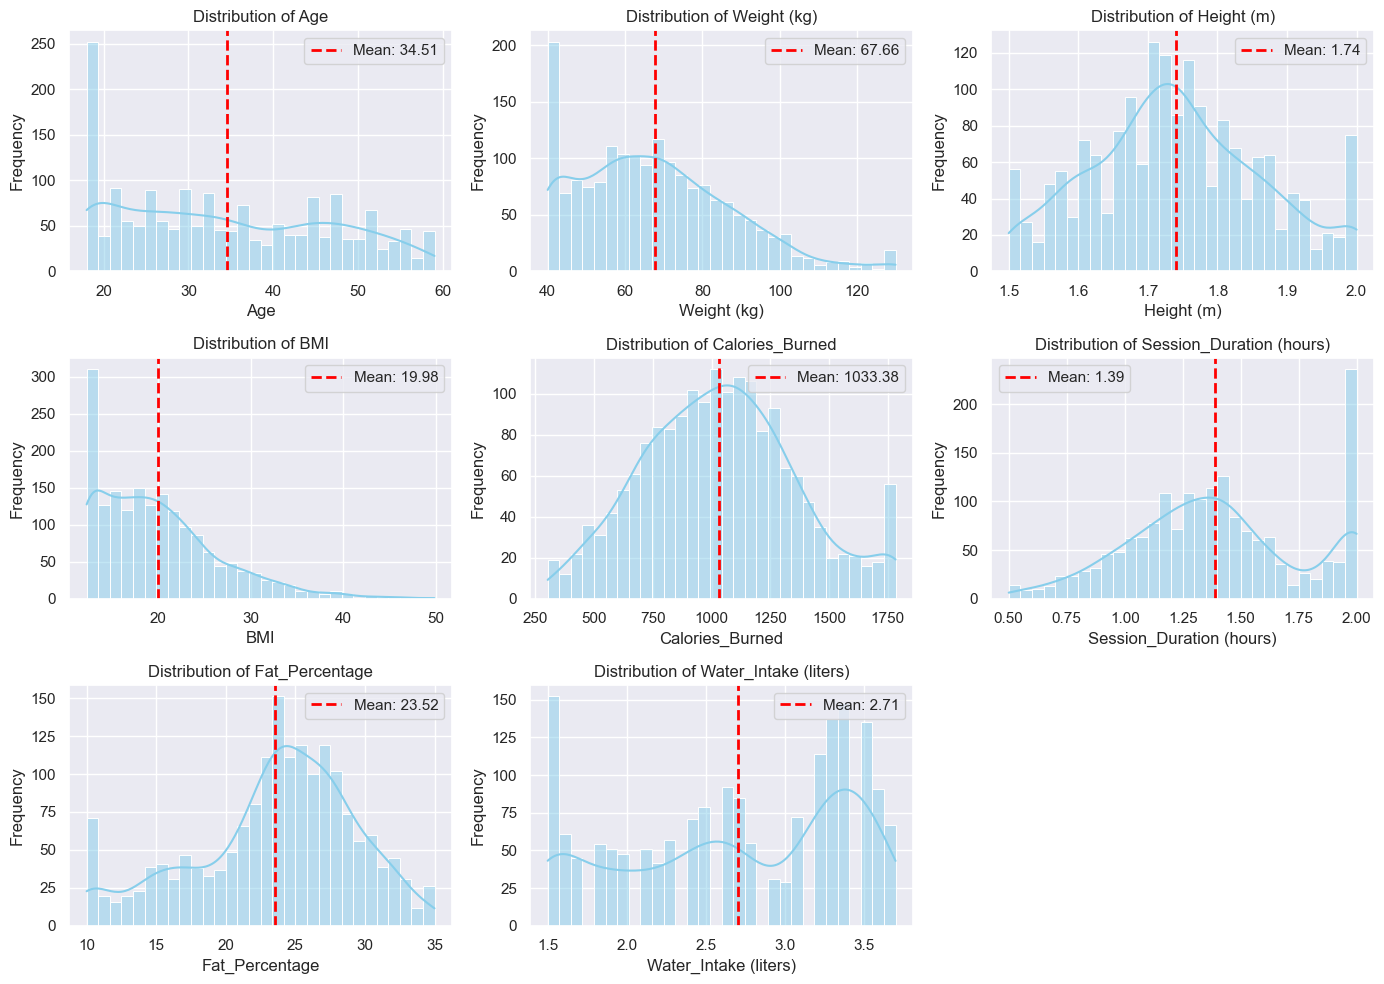

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="muted")
plt.figure(figsize=(14, 10))

num_features = [
    "Age", "Weight (kg)", "Height (m)", "BMI", "Calories_Burned",
    "Session_Duration (hours)", "Fat_Percentage", "Water_Intake (liters)"
]

# 平均值線顏色
mean_color = "red"

for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    data = df_clean[feature]
    
    # 直方圖 + KDE核密度
    sns.histplot(data, kde=True, bins=30, color="skyblue")
    
    # 平均值線
    mean_val = data.mean()
    plt.axvline(mean_val, color=mean_color, linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

/var/folders/5w/kbt5q6f538b2b17zcdhwsbp40000gn/T/ipykernel_65731/180851744.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=feature, palette="Set2")
/var/folders/5w/kbt5q6f538b2b17zcdhwsbp40000gn/T/ipykernel_65731/180851744.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=feature, palette="Set2")


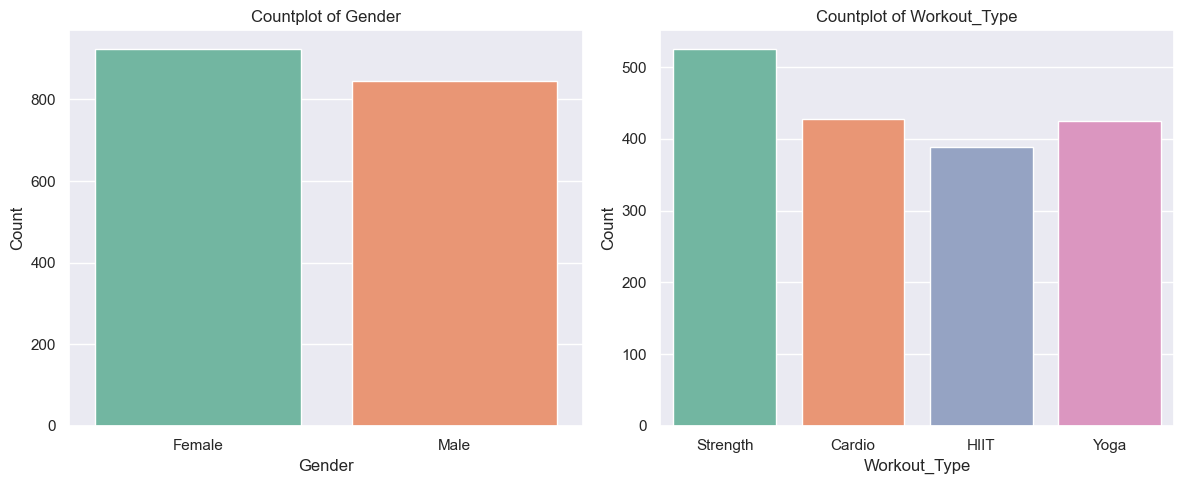

In [14]:
categorical_features = ["Gender", "Workout_Type"]
plt.figure(figsize=(12, 5))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df_clean, x=feature, palette="Set2")
    plt.title(f"Countplot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()